# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [467]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, StackingClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
!pip install xgboost 
from xgboost import XGBClassifier

In [468]:
visa_data = pd.read_csv('EasyVisa.csv')

## Data Overview

- Observations
- Sanity checks

In [469]:
visa_data['case_id'].nunique()

25480

In [470]:
data = visa_data.copy()
data = data.drop('case_id',axis=1)
data

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [471]:
data.shape

(25480, 11)

In [472]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [473]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [474]:
data.duplicated().sum()

0

In [475]:
data['no_of_employees'] = abs(data['no_of_employees'])

In [476]:
num_cols = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
num_cols

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [477]:
cat_cols = data[data.columns[~data.columns.isin(num_cols)]].columns.tolist()

for i in cat_cols:
    print(data[i].value_counts())
    print('_' * 50)
    print('')

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
__________________________________________________

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
__________________________________________________

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
__________________________________________________

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
__________________________________________________

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
__________________________________________________

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
__________________________________________________

full_time

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Problem Statement
The company wishes to maximize the amount of people they hire who will be certified for a Visa. The project is create models that display the best and most important features that pertain to a worker being more likely to be accepted.

### Univariate Analysis

Barplot for continent


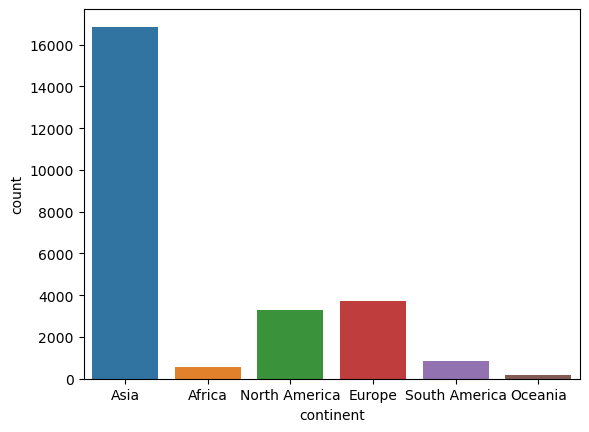

____________________________________________________________________________________________________
Barplot for education_of_employee


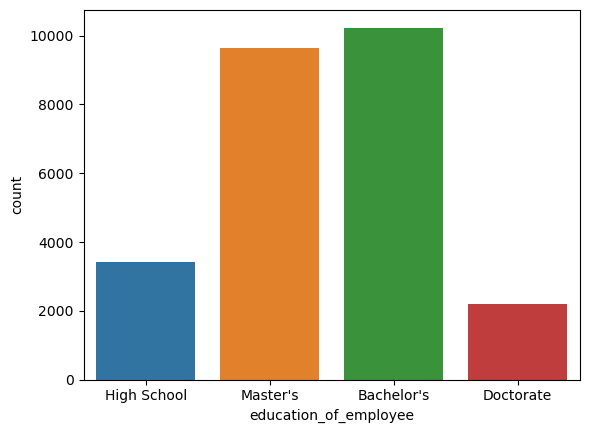

____________________________________________________________________________________________________
Barplot for has_job_experience


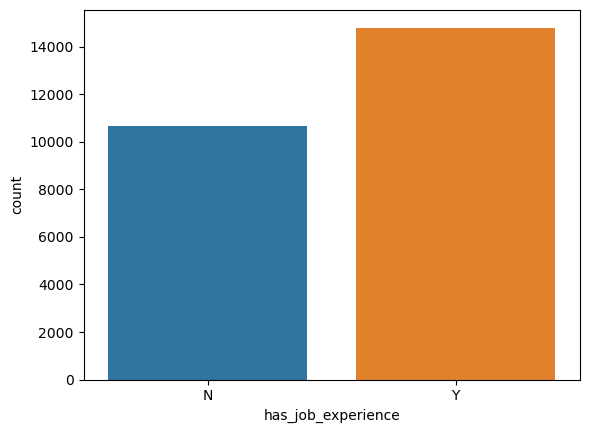

____________________________________________________________________________________________________
Barplot for requires_job_training


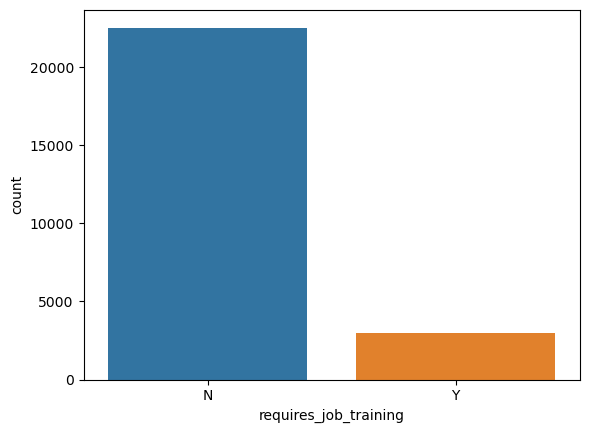

____________________________________________________________________________________________________
Barplot for region_of_employment


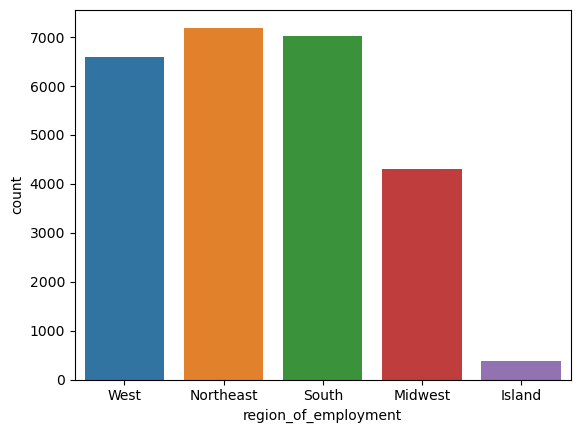

____________________________________________________________________________________________________
Barplot for unit_of_wage


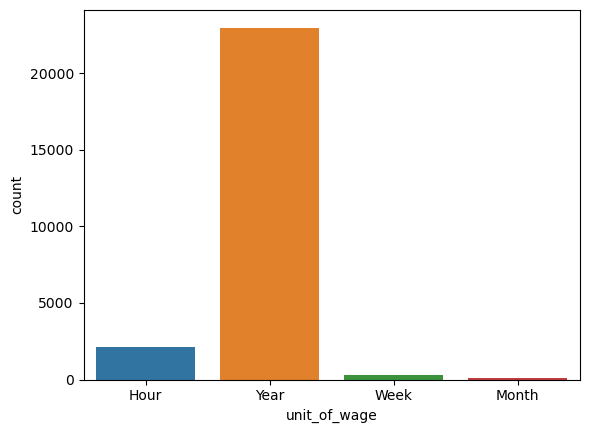

____________________________________________________________________________________________________
Barplot for full_time_position


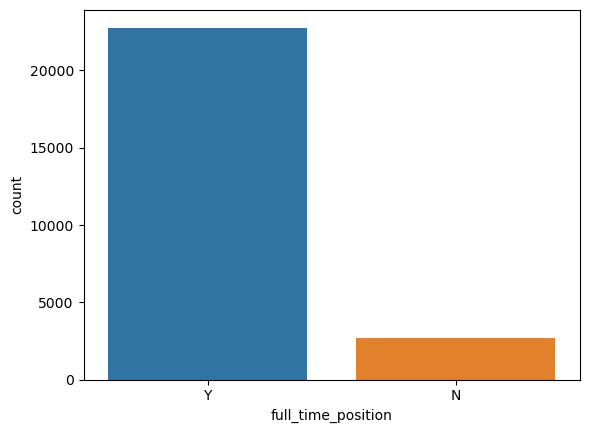

____________________________________________________________________________________________________
Barplot for case_status


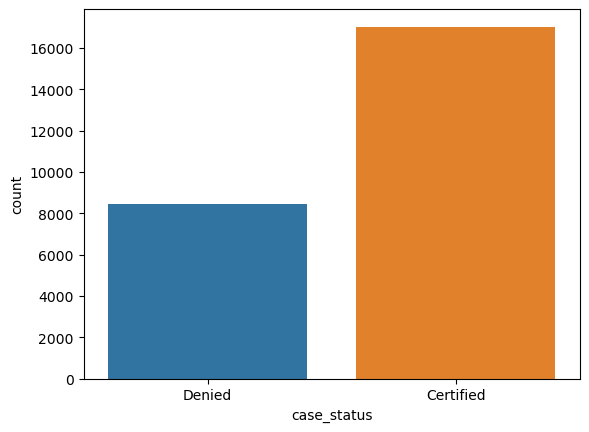

____________________________________________________________________________________________________


''

In [478]:
for i in cat_cols:
    print('Barplot for', i)
    sns.countplot(data, x=i)
    plt.show()
    print('_' * 100)
;

Most workers come from Asia. Most workers have a Bachelor's or higher degree. This can be used to better identify which candidates will be accepted. Most workers have job experience and do not require job training. Most workers are working a full time position. 

In [479]:
def hist_box(data, xvar):
    f, ax = plt.subplots(nrows=2, sharex=True, figsize =(10,10))
    
    sns.boxplot(data = data, x=xvar, showmeans=True, ax=ax[0])
    
    sns.histplot(data = data,x = xvar, ax=ax[1])
    ax[1].axvline(data[xvar].mean(), color='red')
    
    
    plt.show()

Mean for no_of_employees : 5667.09

Histogram & Boxplot for no_of_employees


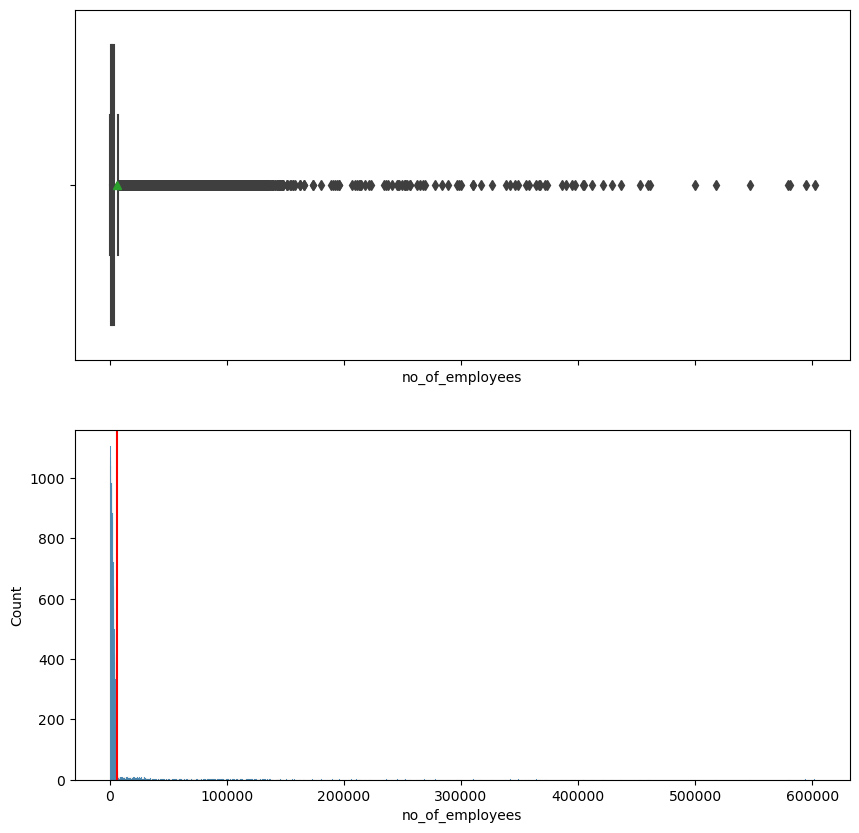

____________________________________________________________________________________________________
Mean for yr_of_estab : 1979.41

Histogram & Boxplot for yr_of_estab


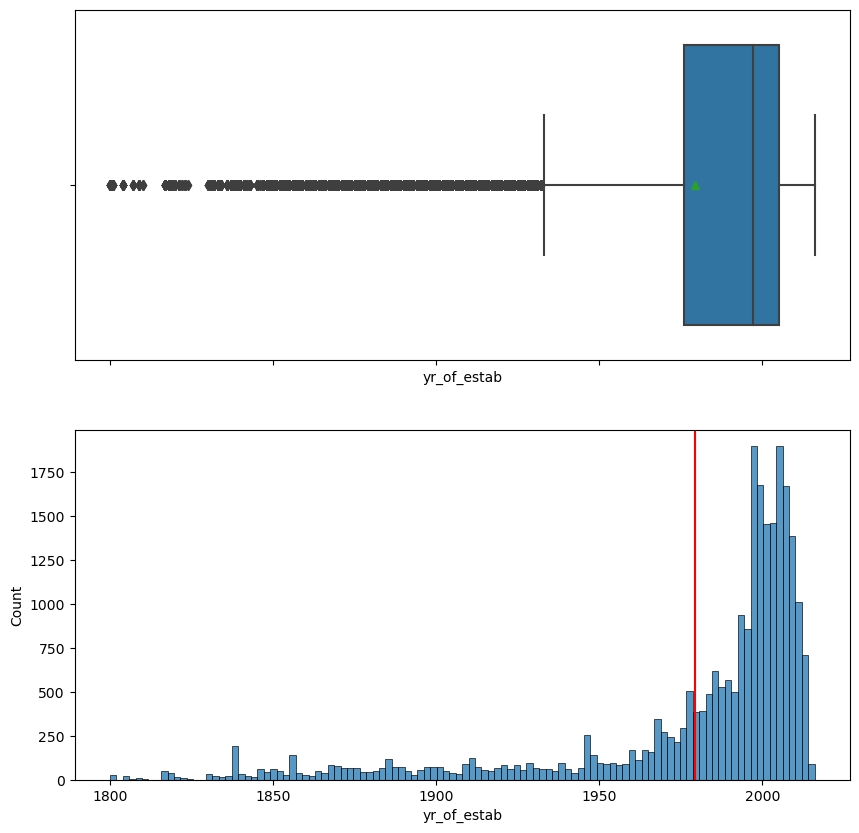

____________________________________________________________________________________________________
Mean for prevailing_wage : 74455.81

Histogram & Boxplot for prevailing_wage


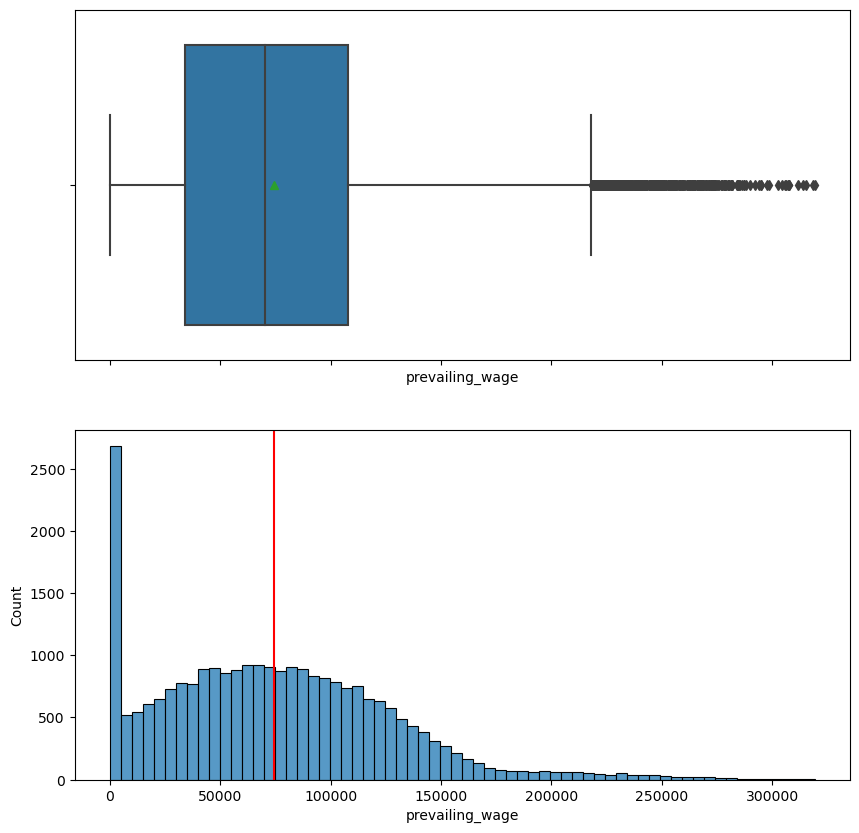

____________________________________________________________________________________________________


In [480]:
for i in num_cols:
    print('Mean for', i, ':', round(data[i].mean(),2))
    print('')
    print('Histogram & Boxplot for',i)
    hist_box(data,i)
    print('_' * 100)

The number of employees in companies is very heavily right skewed. This may be due to a lot of companies being new or just smaller in scale. Most of the companies were established in the late 1900's and early 2000's. The prevailing wage is right skewed, but this data includes the different types of unit wages, so inferences on this data is not very useful. 

### Bivariate Analysis

#### Case Status vs Other Variables

Chart for continent with respect to Case Status


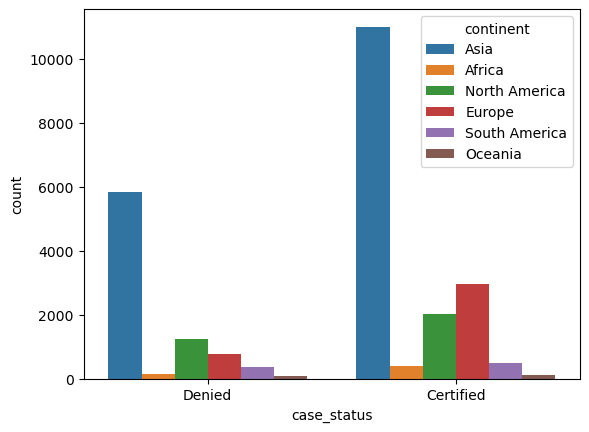

Chart for education_of_employee with respect to Case Status


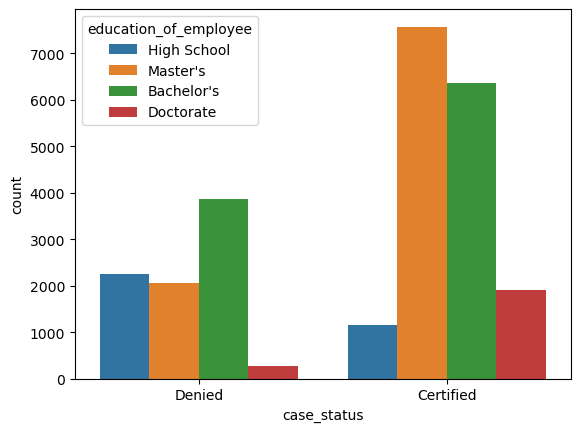

Chart for has_job_experience with respect to Case Status


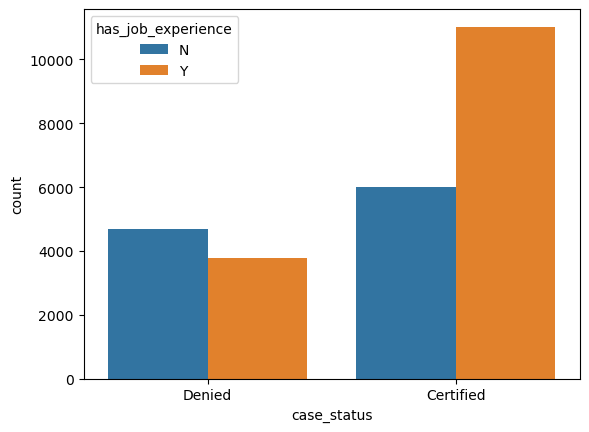

Chart for requires_job_training with respect to Case Status


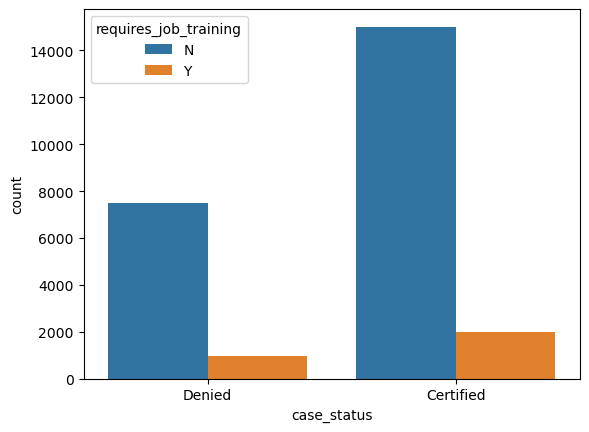

Chart for region_of_employment with respect to Case Status


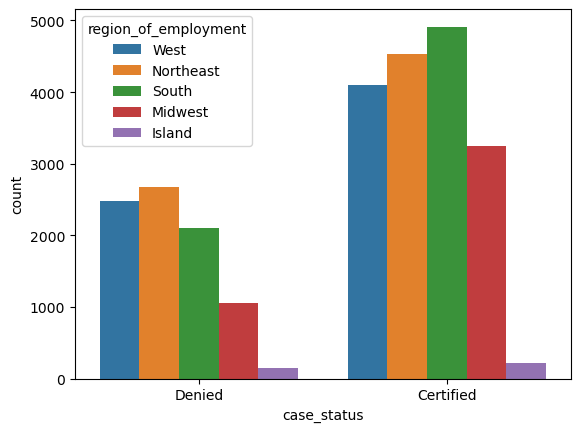

Chart for unit_of_wage with respect to Case Status


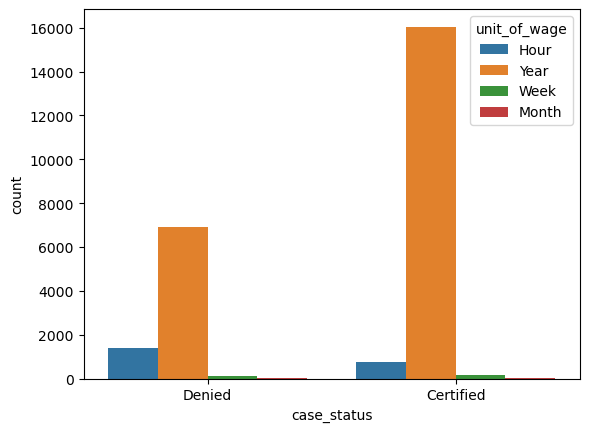

Chart for full_time_position with respect to Case Status


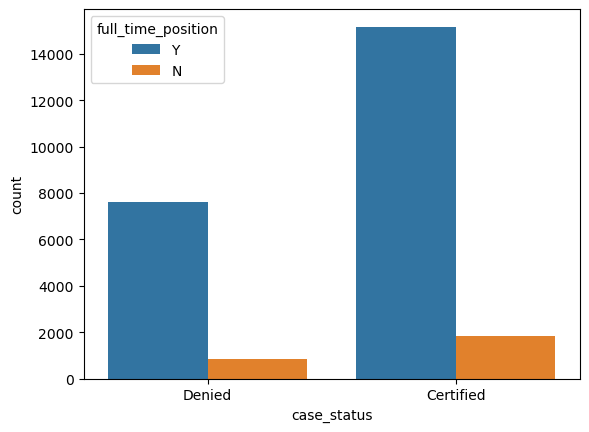

In [481]:
for i in ['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position']:
    print('Chart for', i, 'with respect to Case Status')
    sns.countplot(data, x='case_status', hue=data[i])
    plt.show()
    

These are the charts for the case status versus other categorical variables. Most workers come from Asia, and most certified workers come from Asia and Europe. There is a correlation with having at least a Bachelor's in getting certified. If someone has job experience and does not require training, they are much seemingly much more likley to be certified. Most certfied workers work in the South region and most denied workers would have worked in the Northeast region. This may indicate and competitive imbalance in the regions. If the position is full time, the worker is more likely to be certified. 

<Axes: xlabel='prevailing_wage', ylabel='case_status'>

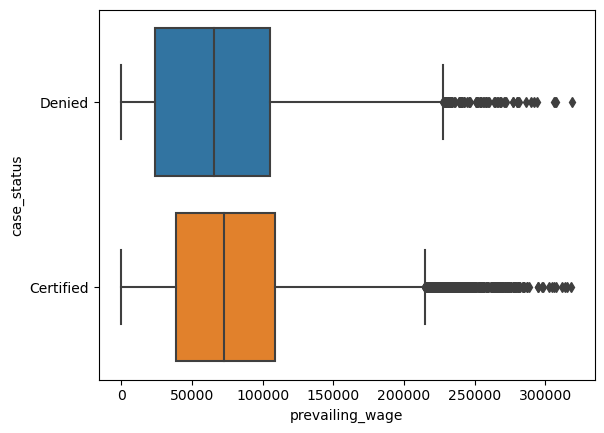

In [482]:
sns.boxplot(data, x='prevailing_wage', y='case_status')

This boxplot shows that certified workers have a higher median prevailing wage, although the wage feature isn't very useful on its own as it includes all wage types. 

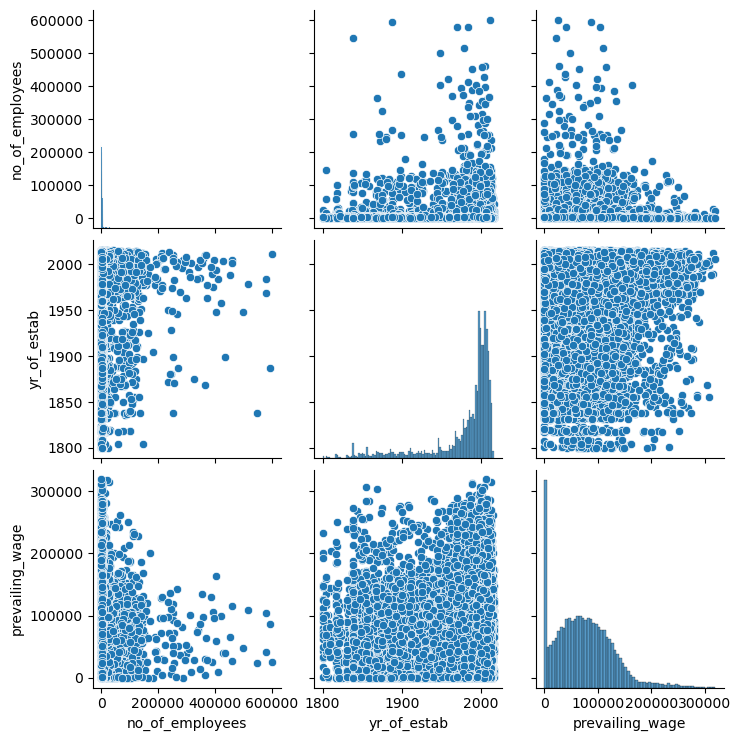

In [483]:
sns.pairplot(data)

### Leading Questions
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## #1

<Axes: xlabel='case_status', ylabel='count'>

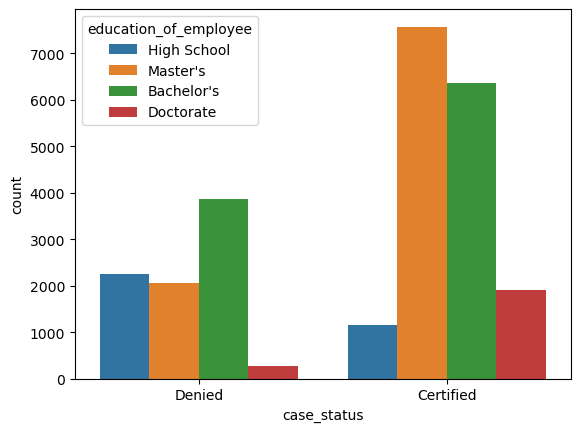

In [484]:
sns.countplot(data, x='case_status',hue='education_of_employee')

Higher education does play a role in being certified as those with a Bachelor's or higher are much more likely to be accepted. 

## #2

In [485]:
data.groupby('continent')['case_status'].value_counts()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: count, dtype: int64

<Axes: xlabel='case_status', ylabel='count'>

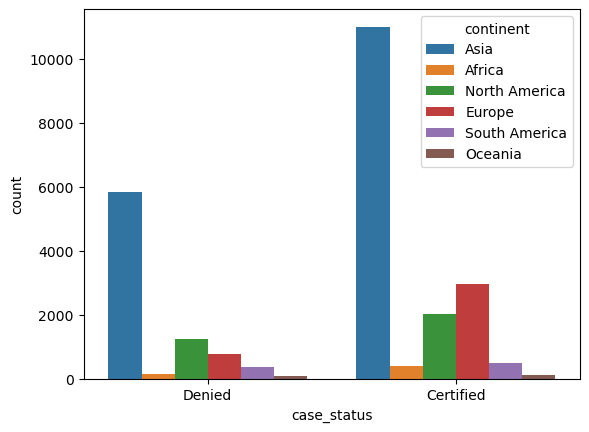

In [486]:
sns.countplot(data, x='case_status', hue='continent')

As most people come from Asia, this continent has the highest count for both accepted and denied visas. However, it seems like workers hailing from Asia or Europe have higher correlation with being accepted. 

## #3

<Axes: xlabel='case_status', ylabel='count'>

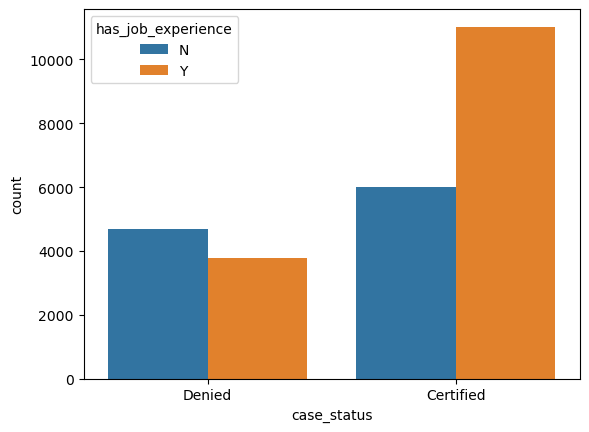

In [487]:
sns.countplot(data, x='case_status', hue='has_job_experience')

Work experience seems to have a positive correlation with being certified. 

## #4

<Axes: xlabel='case_status', ylabel='count'>

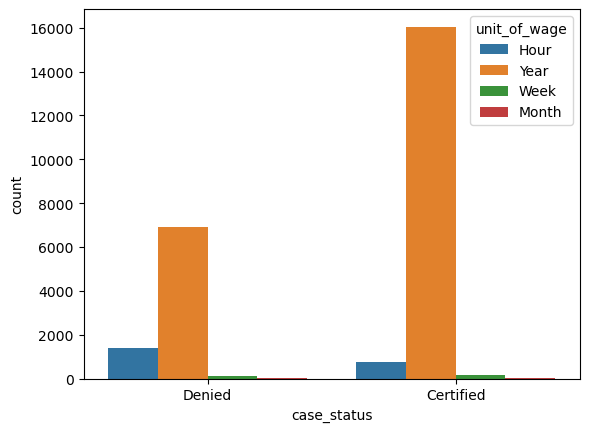

In [488]:
sns.countplot(data, x='case_status', hue='unit_of_wage')

Most workers in general have an annual salary, but it seems having this wage does lead to a higher likely chance of being certified. 

## #5

<Axes: xlabel='prevailing_wage', ylabel='case_status'>

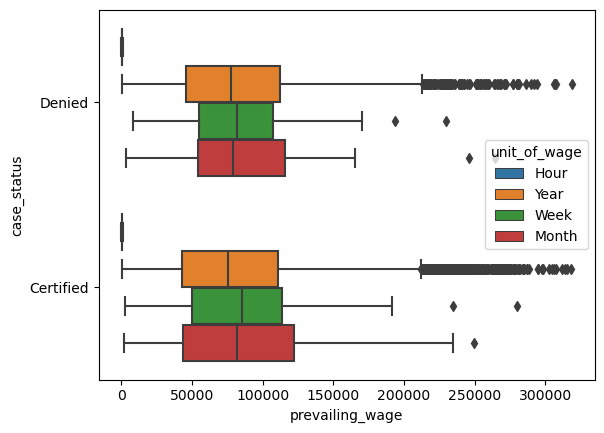

In [489]:
sns.boxplot(data, x='prevailing_wage', y = 'case_status', hue='unit_of_wage')

it seems that those who have been certified have a slighly higher median wage, with the yearly wage having the most right skewed outliers. It seems being certified may lead to a higher wage. 

In [490]:
data.replace({'Y':1,'N':0,'Certified':1, 'Denied': 0},inplace = True)
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1


<Axes: >

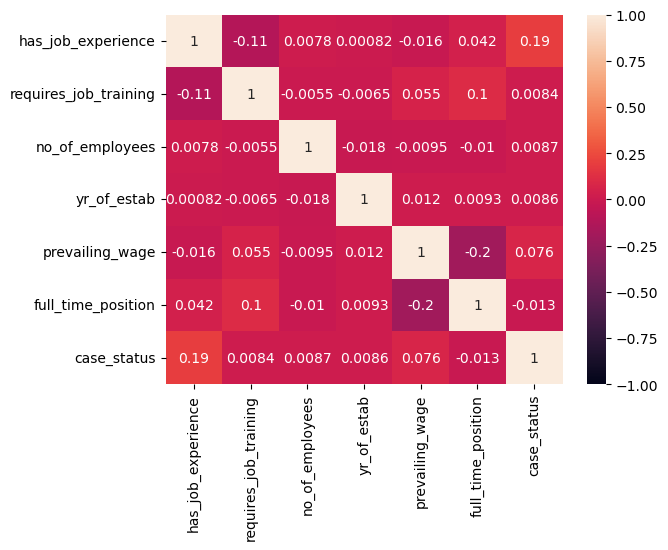

In [491]:
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, vmax=1)

It seems that previous job experience has the highest correlation with being accepted for a Visa.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [492]:
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no null values in the dataset, but other data manipulation has been done, such has fixing the number of employees feature to not have negative values. 

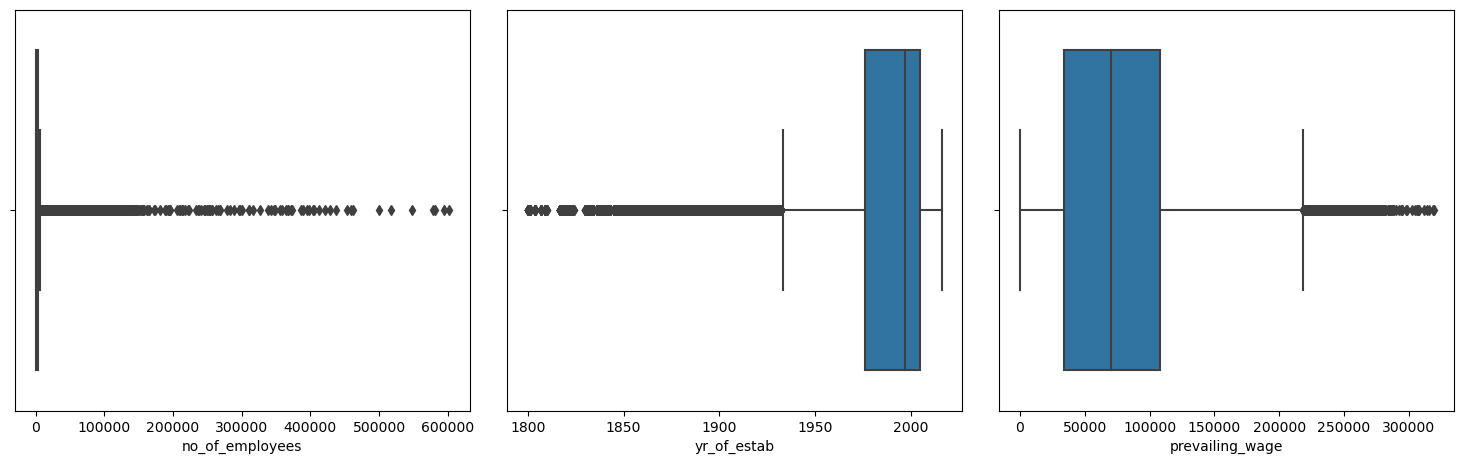

In [493]:
plt.figure(figsize=(15,5))

for i, x in enumerate(num_cols):
    plt.subplot(1,3, i + 1)
    sns.boxplot(data=data, x=x)
    plt.tight_layout(pad=2)
        
plt.show()

There are outliers in the numerical features, but they make sense within the context of the data, so they will be left. 

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: >

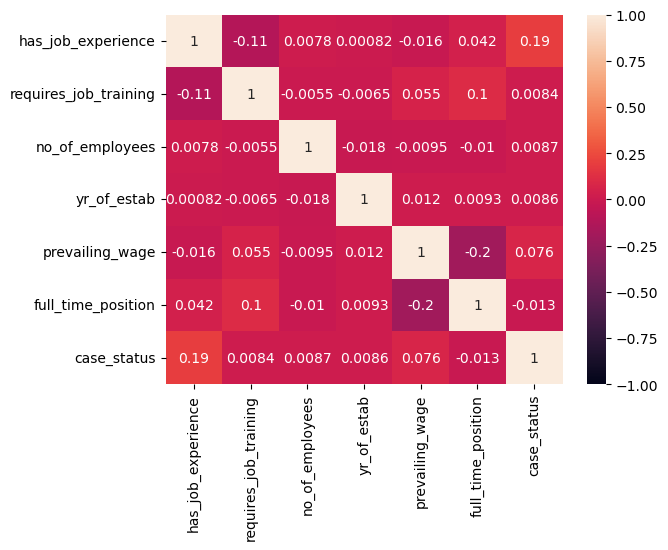

In [494]:
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, vmax=1)

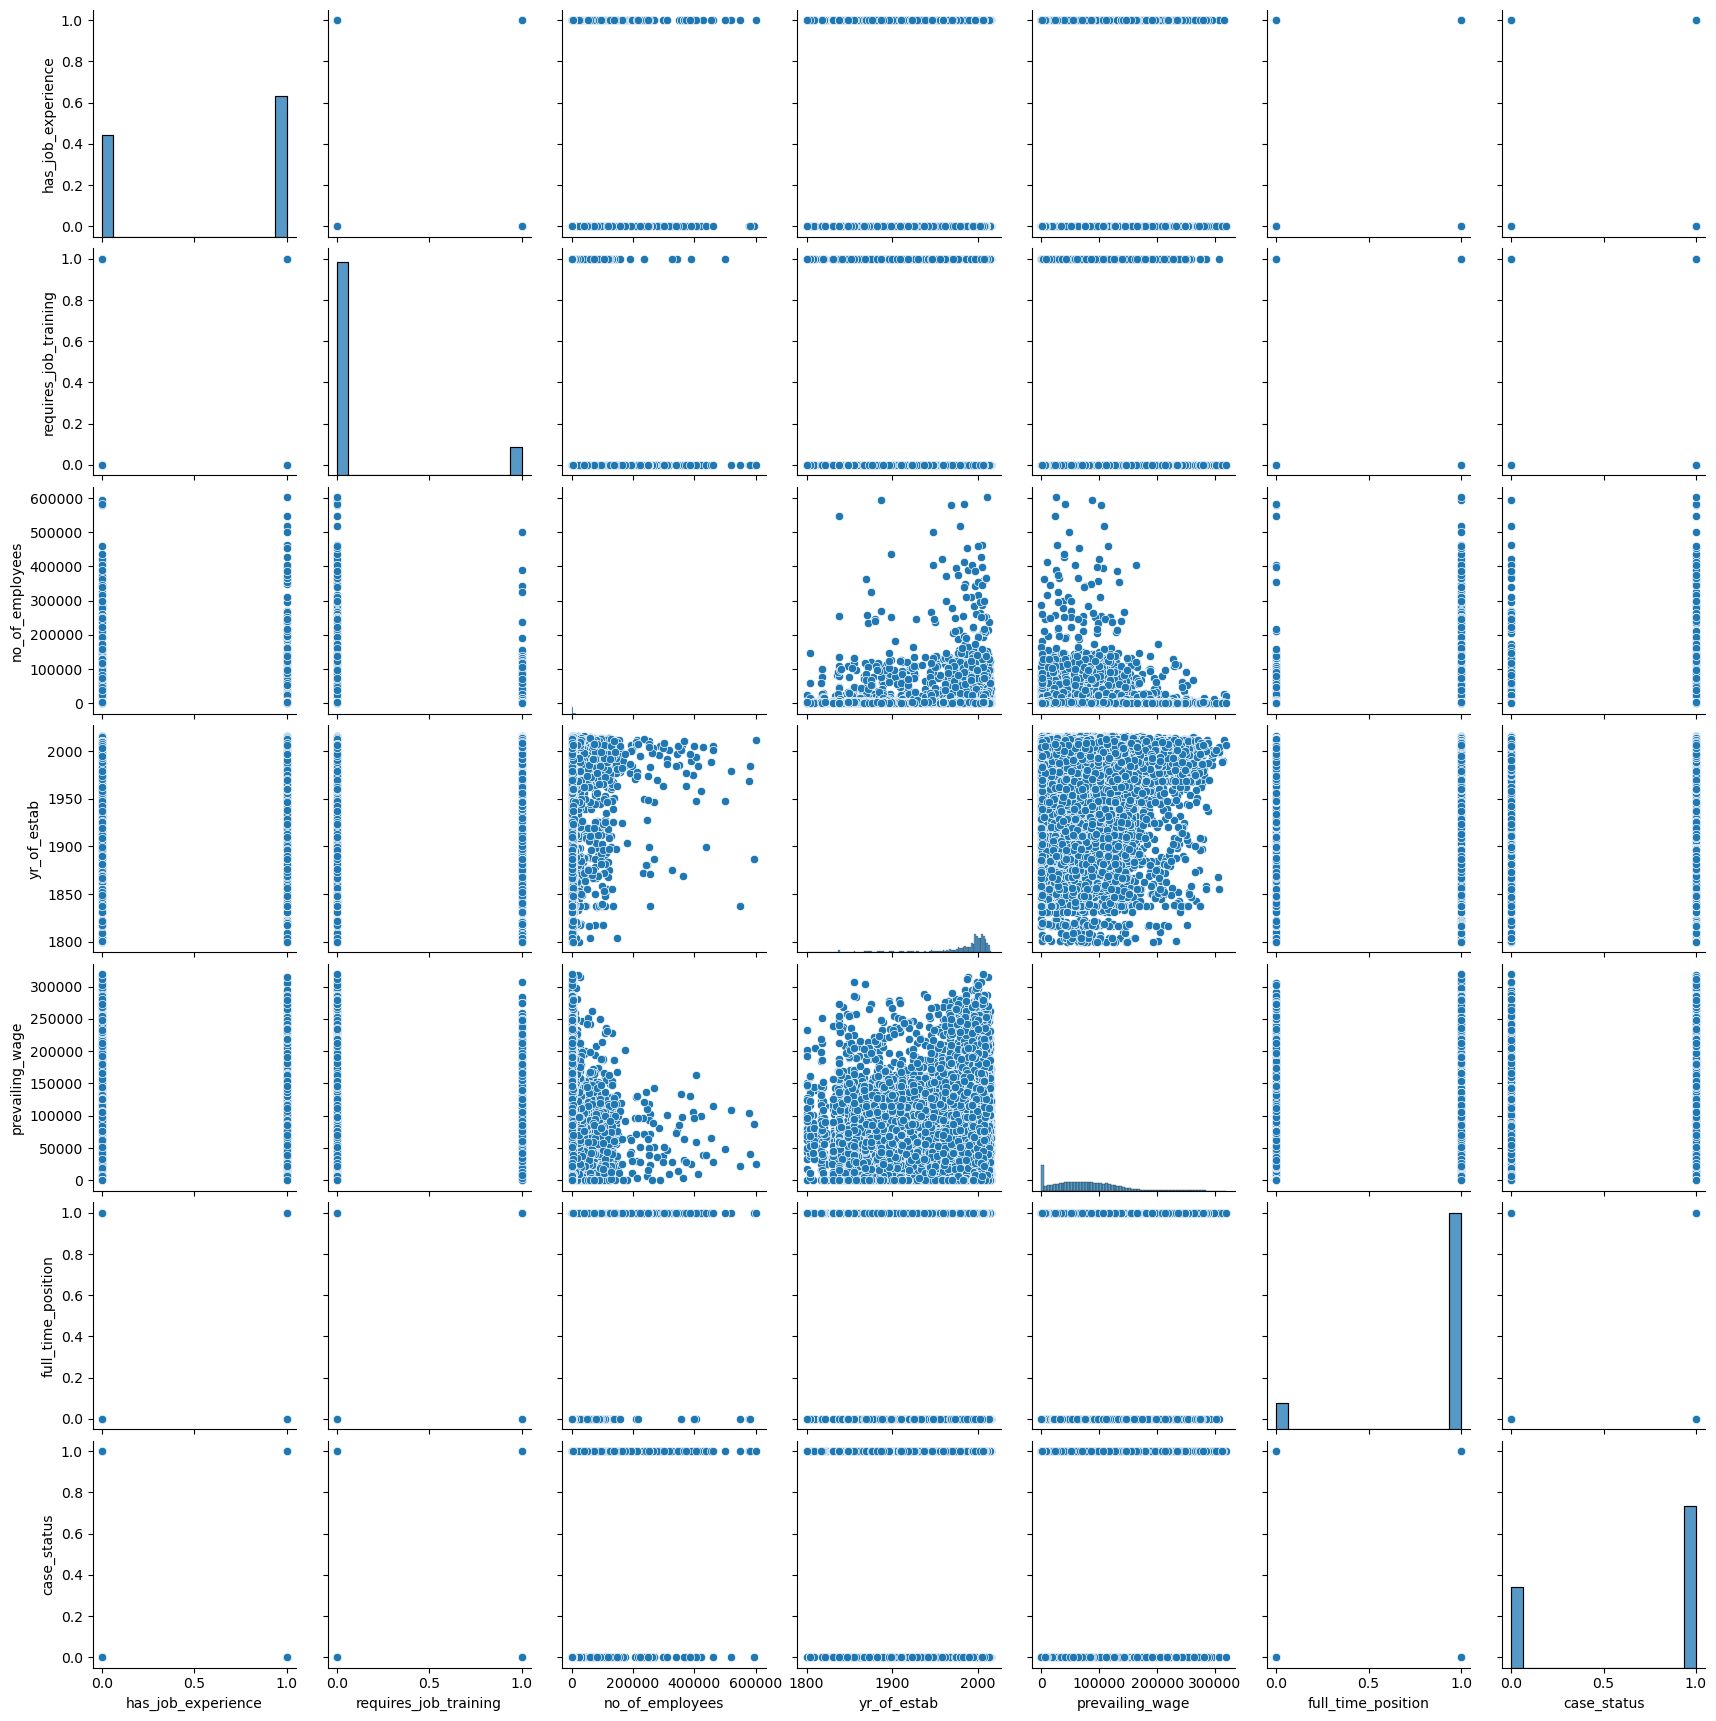

In [495]:
sns.pairplot(data)

It seems the features have not been significantly altered with data manipulation. 

## Data Preparation

In [496]:
data=pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   no_of_employees                    25480 non-null  int64  
 3   yr_of_estab                        25480 non-null  int64  
 4   prevailing_wage                    25480 non-null  float64
 5   full_time_position                 25480 non-null  int64  
 6   case_status                        25480 non-null  int64  
 7   continent_Africa                   25480 non-null  bool   
 8   continent_Asia                     25480 non-null  bool   
 9   continent_Europe                   25480 non-null  bool   
 10  continent_North America            25480 non-null  bool   
 11  continent_Oceania                  25480 non-null  boo

In [497]:
x = data.drop('case_status',axis=1)
y = data['case_status']

display(x.head())
y.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Africa,continent_Asia,continent_Europe,continent_North America,...,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,14513,2007,592.2029,1,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
1,1,0,2412,2002,83425.6500,1,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,0,1,44444,2008,122996.8600,1,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,0,0,98,1897,83434.0300,1,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,1,0,1082,2005,149907.3900,1,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True


0    0
1    1
2    0
3    0
4    1
Name: case_status, dtype: int64

In [498]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=1, stratify=y)

## Building bagging and boosting models

In [499]:
def model_perf(model):
    trainpred = model.predict(xtrain)
    testpred = model.predict(xtest)
    
    train_acc = accuracy_score(ytrain, trainpred)
    test_acc = accuracy_score(ytest, testpred)
    
    train_recall = recall_score(ytrain,trainpred)
    test_recall = recall_score(ytest, testpred)
    
    train_prec = precision_score(ytrain, trainpred)
    test_prec = precision_score(ytest, testpred)
    
    df = pd.DataFrame({
        'Accuracy of Training Set' : train_acc,
        'Accuracy of Testing Set' : test_acc,
        'Recall Score of Training Set' : train_recall,
        'Recall Score of Testing Set' : test_recall,
        'Precision Score of Testing Set' : train_prec,
        'Precision Score of Training Set' : test_prec
    }, index=[0])
    
    return df

In [500]:
def get_cm(model, actual_y):
    predtest = model.predict(xtest)
    cm = confusion_matrix(actual_y, predtest)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

In [501]:
def feat_imp(model):
    features = xtrain.columns.tolist()

    model_imp = model.feature_importances_
    indices = np.argsort(model_imp)

    plt.figure(figsize=(12,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), model_imp[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

### Decision Tree

In [502]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=1)

In [503]:
dtree_perf = model_perf(dtree)
dtree_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,1.0,0.659602,1.0,0.742018,1.0,0.746698


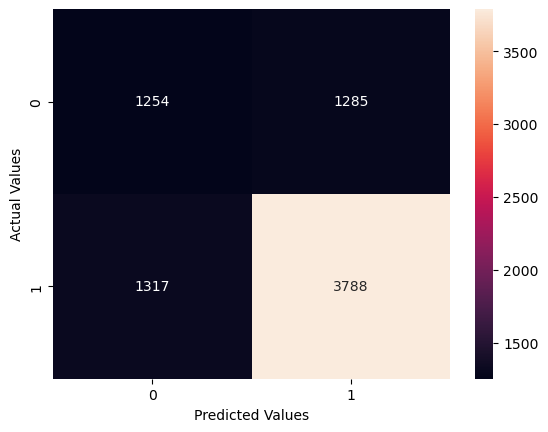

In [504]:
dtree_cm = get_cm(dtree,ytest)
dtree_cm

The recall and precision of the test set is fairly lower than the training, which may be an indication of overfitting of the model. 

#### Hypertuning Decision Tree

In [505]:
dtree_tuned = DecisionTreeClassifier(random_state=1)

param_grid_tree = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
    
scorer = metrics.make_scorer(metrics.r2_score)
    
grid_search_dtree = GridSearchCV(dtree_tuned, param_grid_tree, scoring=scorer)
grid_search_dtree = grid_search.fit(xtrain, ytrain)

dtree_tuned = grid_search_dtree.best_estimator_
dtree_tuned = dtree_tuned.fit(xtrain, ytrain)

In [506]:
dtree_tuned_perf = model_perf(dtree_tuned)
dtree_tuned_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.73817,0.729853,0.917149,0.915573,0.747895,0.740964


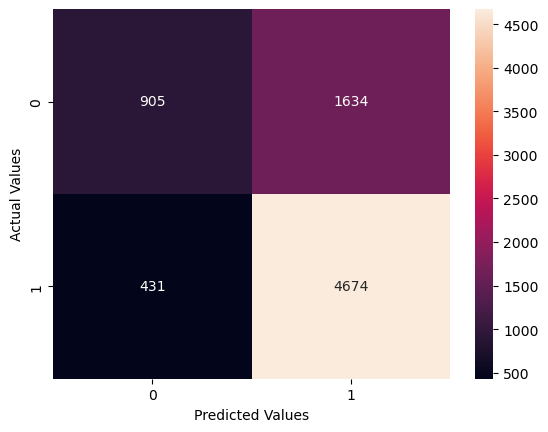

In [507]:
dtree_tuned_cm = get_cm(dtree_tuned,ytest)
dtree_tuned_cm

The metric scores of the training set have decreased, but they are much closer to their testing counterpart values. As such, the hypertuning as mostly fixed the overfitting issue, and the model is fairly good.

#### Feature Importances

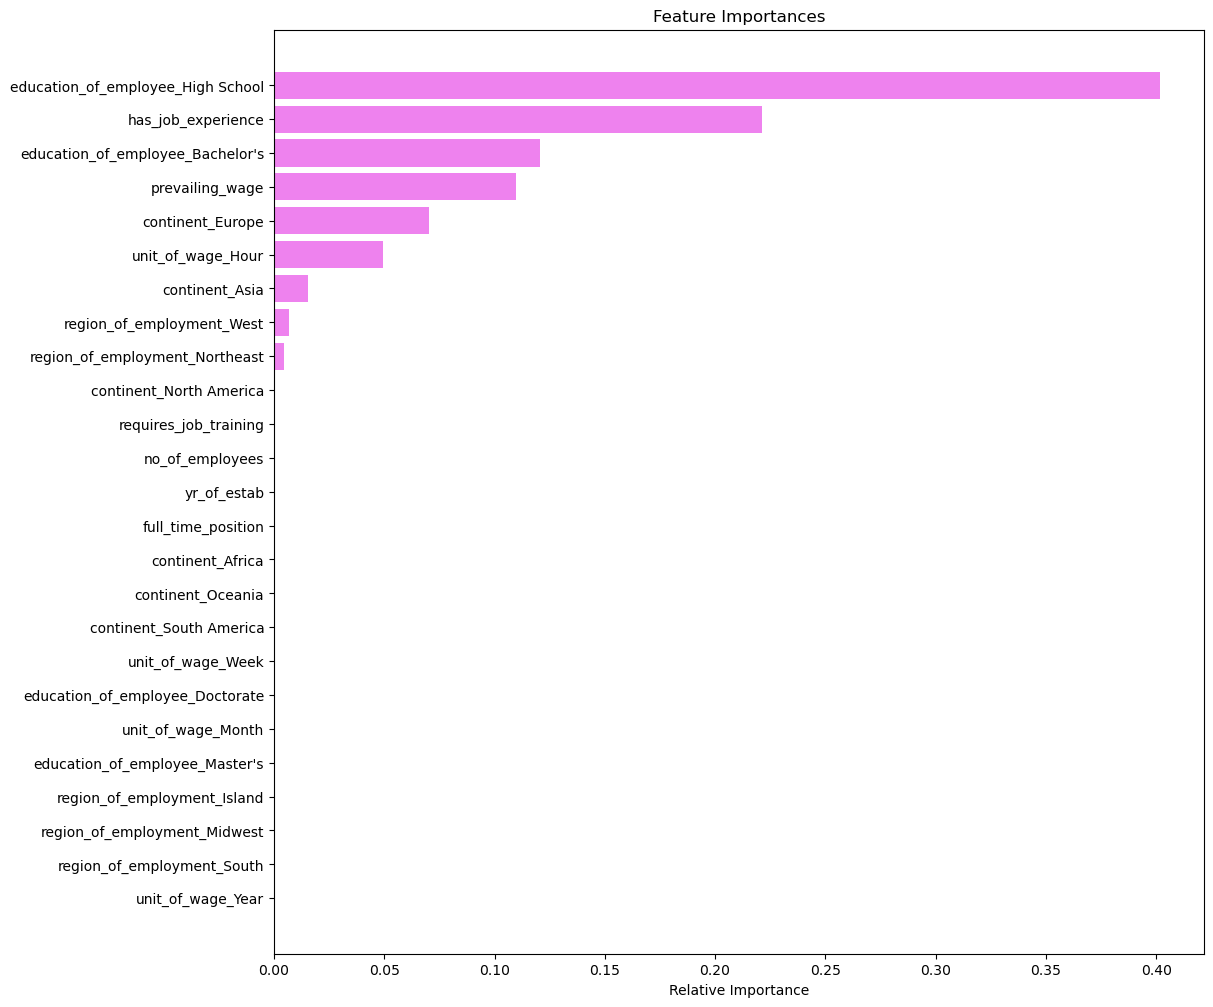

In [508]:
feat_imp(dtree_tuned)

It seems that having a high school education has the most impact in being Visa certified. 

### Random Forest

In [509]:
rforest = RandomForestClassifier(random_state=1)
rforest.fit(xtrain,ytrain)

RandomForestClassifier(random_state=1)

In [510]:
forest_perf = model_perf(rforest)
forest_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,1.0,0.723574,1.0,0.83526,1.0,0.770231


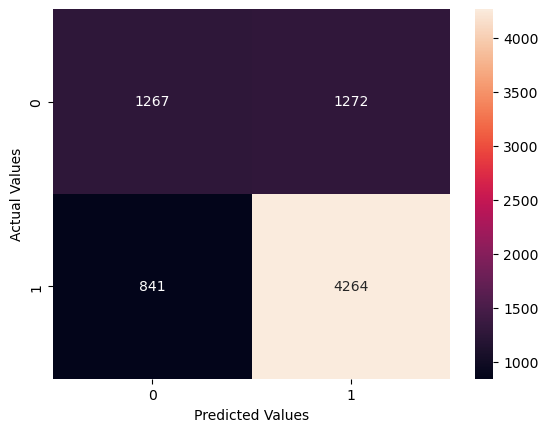

In [511]:
get_cm(rforest,ytest)

The default random forest classifier shows signs of overfitting as the metrics of the testing set are much lower than the training set

#### Hypertuning Random Forest

In [512]:
forest_tuned = RandomForestClassifier(random_state=1)

param_grid_forest = {
    "class_weight" : [{0: 0.3, 1: 0.7}],
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
        
grid_search_forest = GridSearchCV(forest_tuned, param_grid_forest, scoring=scorer)
grid_search_forest = grid_search_forest.fit(xtrain, ytrain)

forest_tuned = grid_search_forest.best_estimator_
forest_tuned.fit(xtrain, ytrain)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_samples=0.5,
                       min_samples_leaf=2, n_estimators=50, random_state=1)

In [513]:
forest_tuned_perf = model_perf(forest_tuned)
forest_tuned_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.818345,0.731685,0.976496,0.914594,0.797163,0.742998


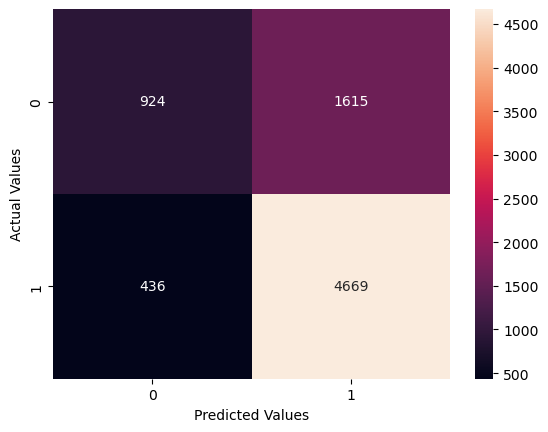

In [514]:
get_cm(forest_tuned,ytest)

The training and testing metrics are closer in values, so the overfitting problem has been slighlty decreased, but the precision and accuracy is relatively low for the testings set. 

#### Feature Importances

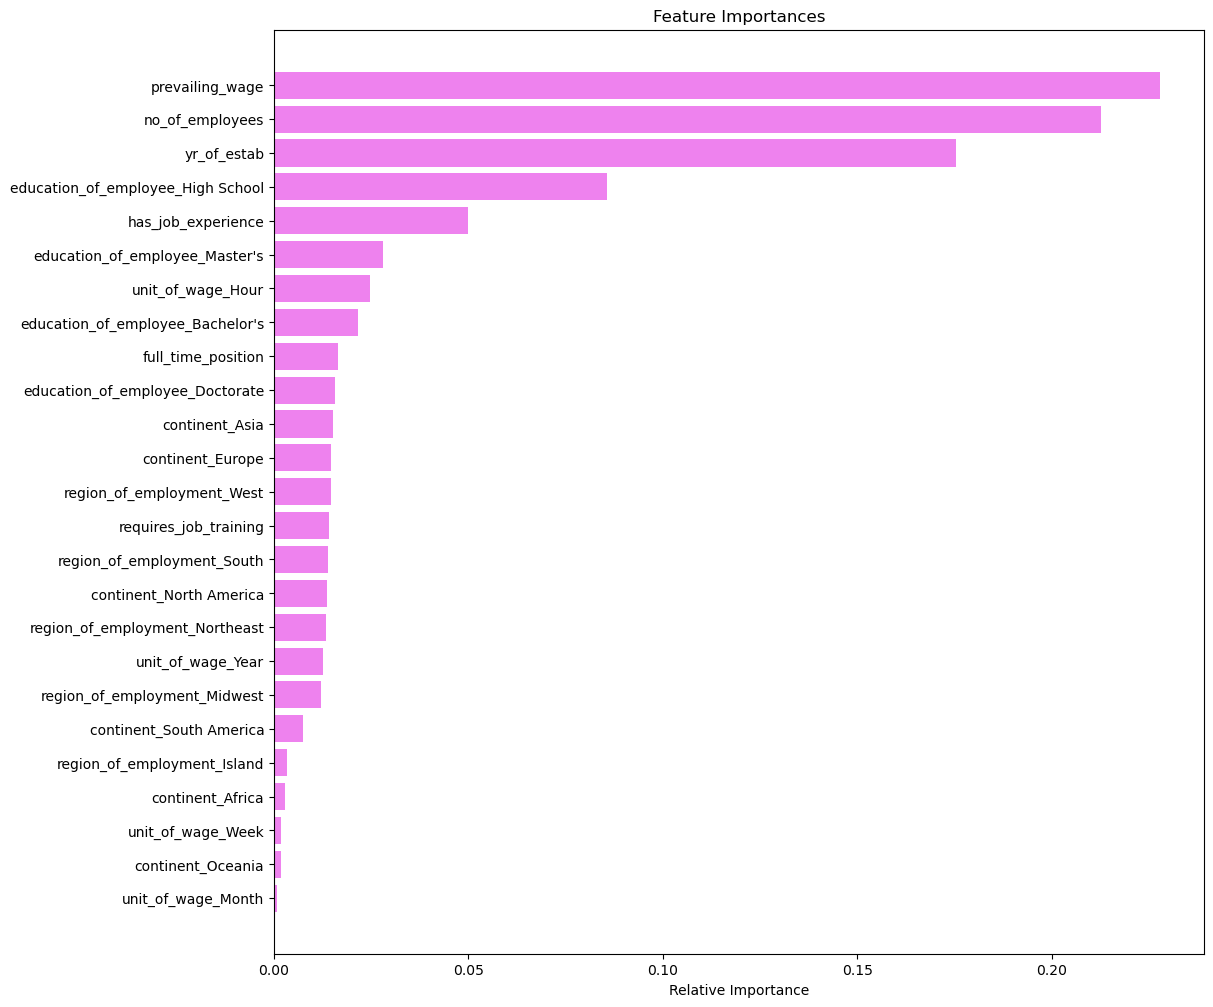

In [515]:
feat_imp(forest_tuned)

It seems, according to the random forest model, that the prevailing wage has the highest importance with respect to Visa accreditation.  

### Bagging Classifier

In [516]:
bag = BaggingClassifier(random_state=1)
bag.fit(xtrain,ytrain)

BaggingClassifier(random_state=1)

In [517]:
bag_perf = model_perf(bag)
bag_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.983516,0.702904,0.984387,0.776494,0.990875,0.77817


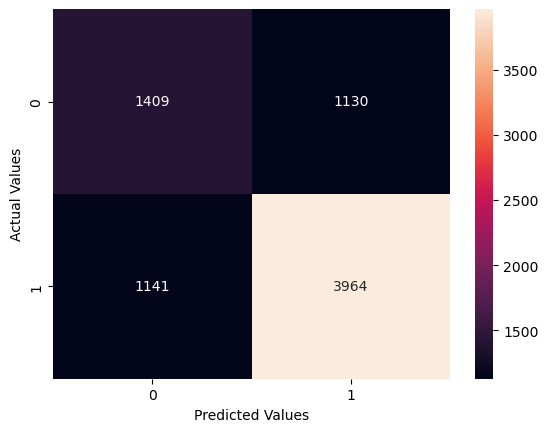

In [518]:
get_cm(bag,ytest)

The default bagging classifier shows signs of overfitting as the training set is fairing much better than the testing set. 

#### Hypertuning Bagging Model

In [519]:
bag_tuned = BaggingClassifier(random_state=1)

param_grid_bag = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
        
grid_search_bag = GridSearchCV(bag_tuned, param_grid_bag, scoring=scorer)
grid_search_bag = grid_search.fit(xtrain, ytrain)

bag_tuned = grid_search_bag.best_estimator_
bag_tuned = bag_tuned.fit(xtrain, ytrain)

In [520]:
bag_tuned_perf = model_perf(bag_tuned)
bag_tuned_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.73817,0.729853,0.917149,0.915573,0.747895,0.740964


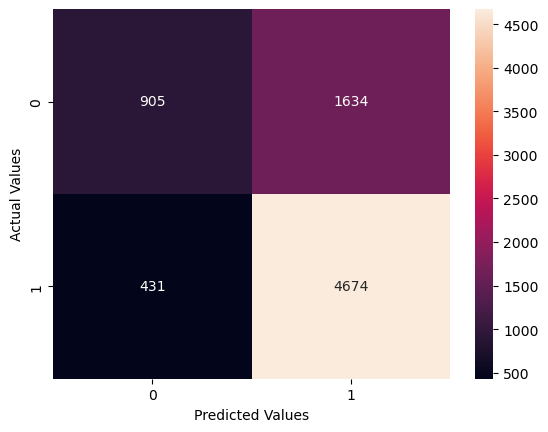

In [521]:
get_cm(bag_tuned, ytest)

The hypertuned bagging model has gotten rid of most of the overfitting and the training and testing sets have very similar metrics

#### Feature Importances

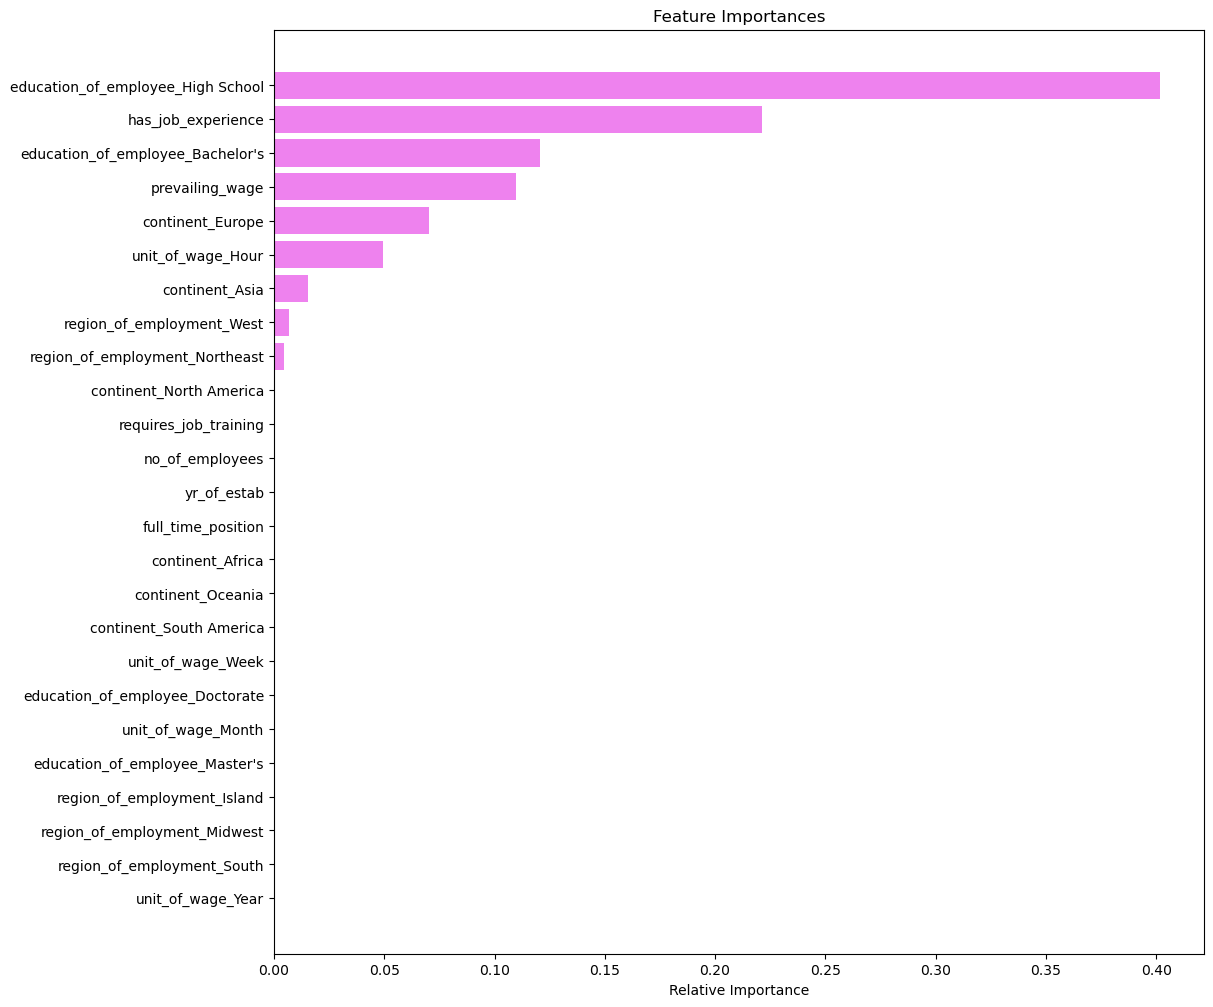

In [522]:
feat_imp(bag_tuned)

Having a high school education has the highest importance in earning a Visa, according to the bagging model. 

### AdaBoost Model

In [523]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=1)

In [524]:
ada_perf = model_perf(ada)
ada_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.738058,0.734301,0.886259,0.883252,0.760937,0.75858


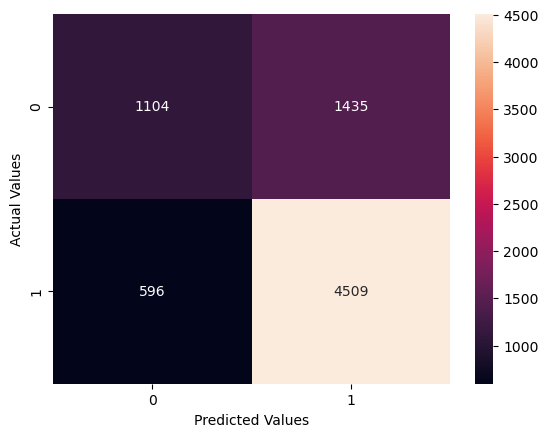

In [525]:
get_cm(ada,ytest)

The model does not suffer from overfitting very much, but it may be able to generalize the data better and get higher metrics.

#### Hypertuning AdaBoost Model

In [526]:
ada_tuned = AdaBoostClassifier(random_state=1)

param_grid_ada = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
        
grid_search_ada = GridSearchCV(ada_tuned, param_grid_ada, scoring=scorer)
grid_search_ada.fit(xtrain, ytrain)

ada_tuned = grid_search_ada.best_estimator_
ada_tuned.fit(xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [527]:
ada_tuned_perf = model_perf(ada_tuned)
ada_tuned_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.757737,0.742151,0.886846,0.877375,0.780396,0.769059


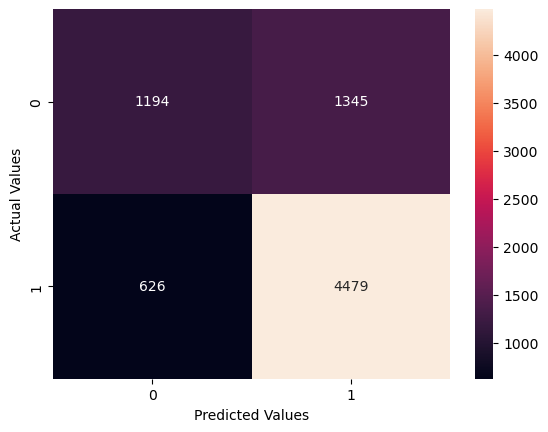

In [528]:
get_cm(ada_tuned, ytest)

Hypertuning slightly increased the AdaBoost Model's metrics, but not to a significant degree.

#### Feature Importances

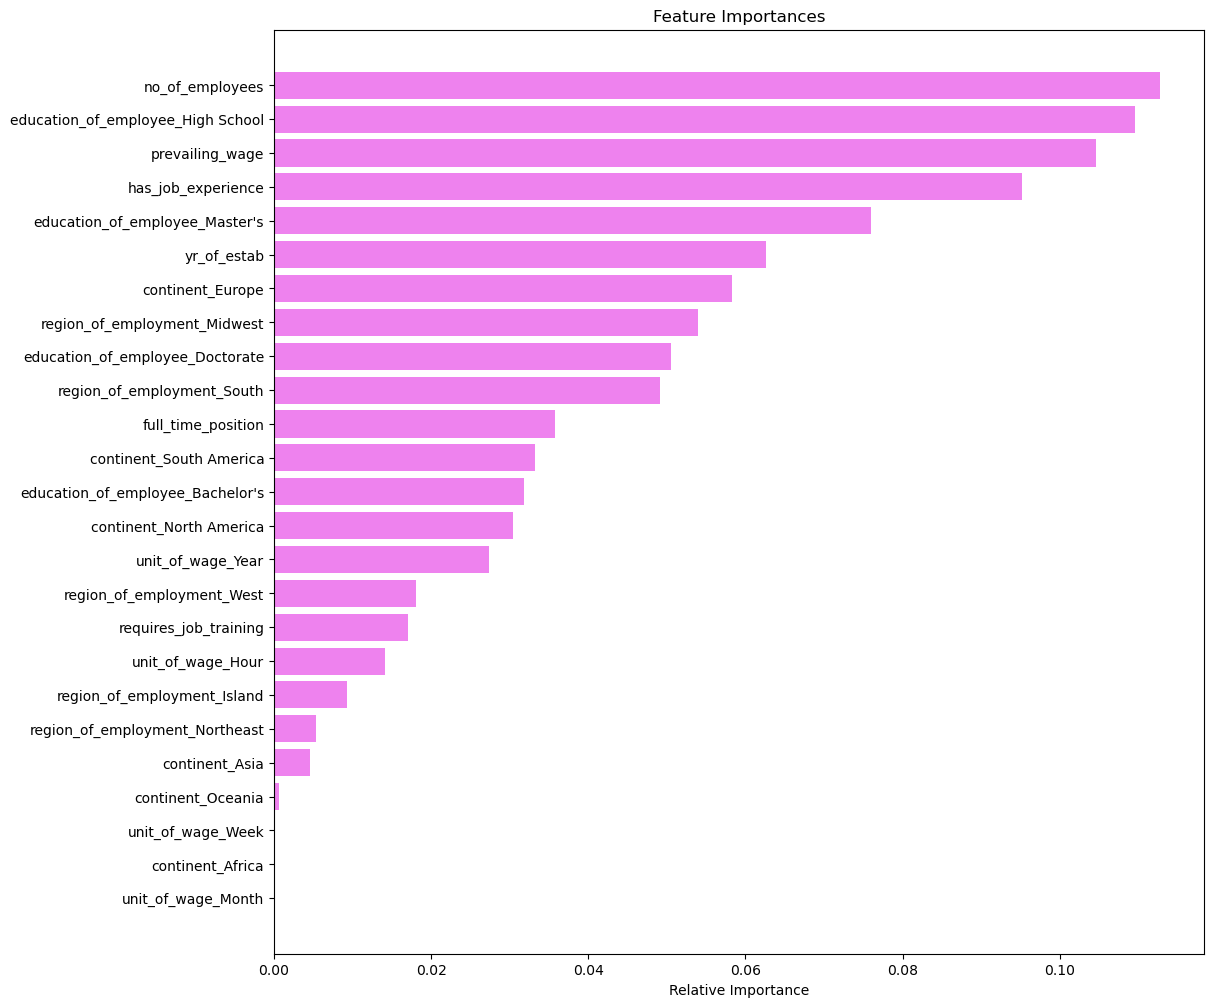

In [529]:
feat_imp(ada_tuned)

Accoridng the the hypertuned AdaBoost model, the number of employees at the company has the highest value in determining if a Visa is accepted. 

### Gradient Boosting Model

In [530]:
gboost = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gboost.fit(xtrain,ytrain)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [531]:
gboost_perf=model_perf(gboost)
gboost_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.756728,0.74516,0.880383,0.875612,0.78257,0.772955


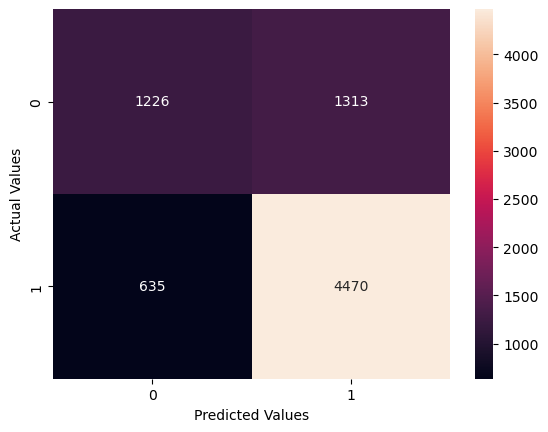

In [532]:
get_cm(gboost,ytest)

The model does not seem to be overfitting, but it could be generalizing the data better.

#### Hypertuning Gradient Boost Model

In [533]:
gboost_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

param_grid_gboost = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
        
grid_search_gboost = GridSearchCV(gboost_tuned, param_grid_gboost, scoring=scorer)
grid_search_gboost.fit(xtrain, ytrain)

gboost_tuned = grid_search_gboost.best_estimator_
gboost_tuned.fit(xtrain, ytrain)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [534]:
gboost_tuned_perf = model_perf(gboost_tuned)
gboost_tuned_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.755831,0.74516,0.881726,0.876787,0.780967,0.77239


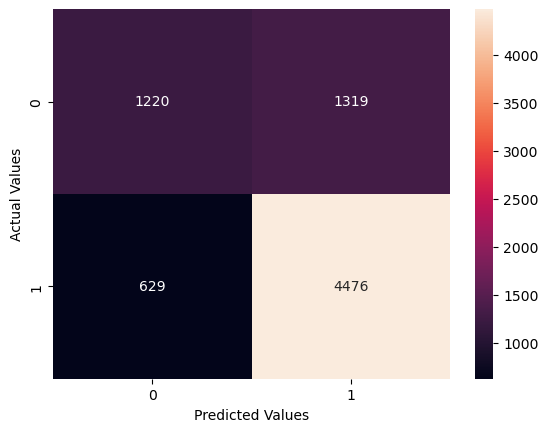

In [535]:
get_cm(gboost_tuned,ytest)

The metrics did not change too much with the hypertuning, and the model is still not considered overfit. 

#### Feature Importances

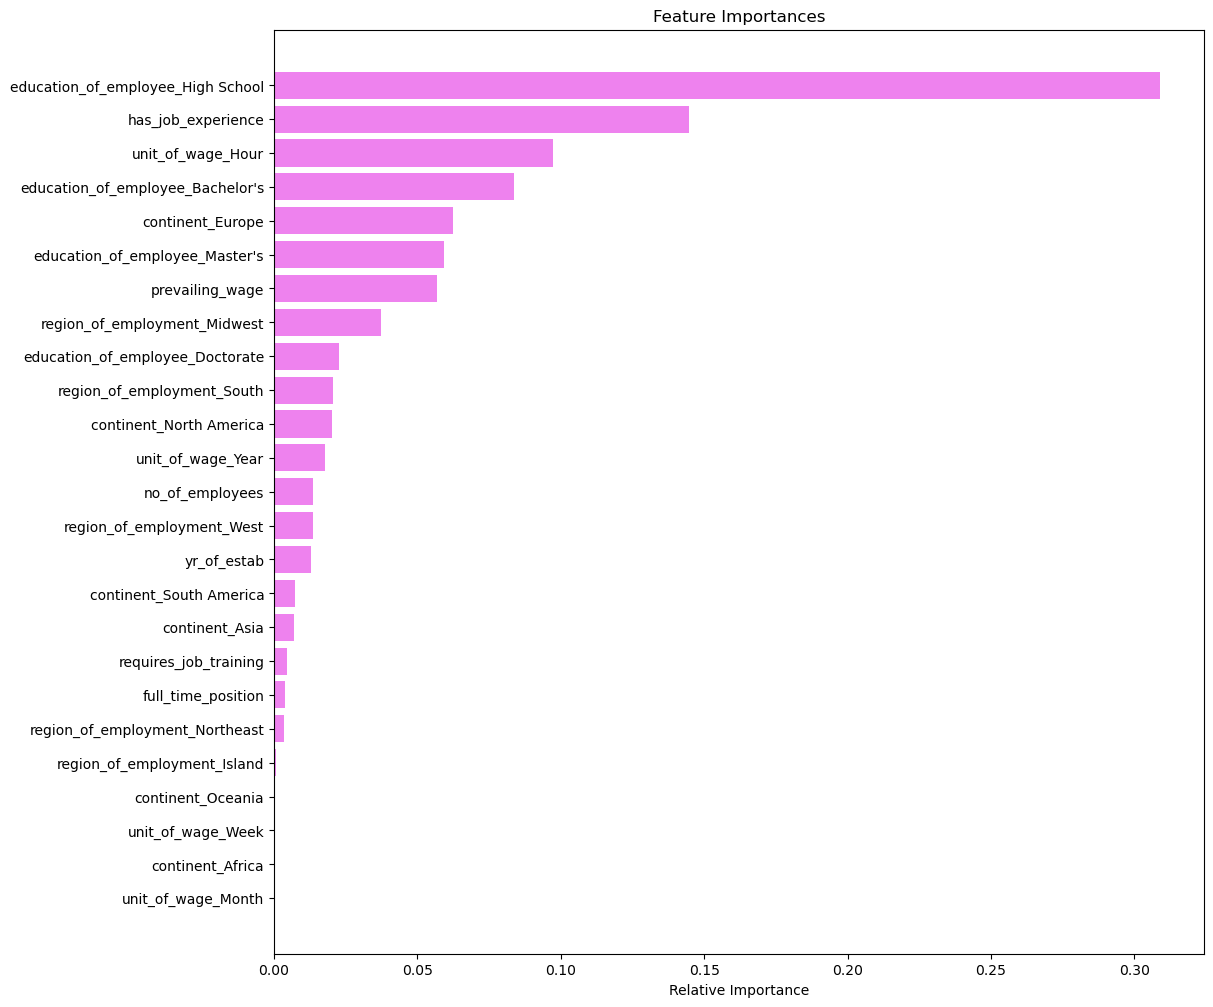

In [536]:
feat_imp(gboost_tuned)

According the the tuned Gradient Boosting Model, having a high school education is the most important feature for being accepted for a Visa. 

### XGBoost Model

In [537]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [538]:
xgb_perf = model_perf(xgb)
xgb_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.840884,0.726583,0.930664,0.850735,0.8464,0.765826


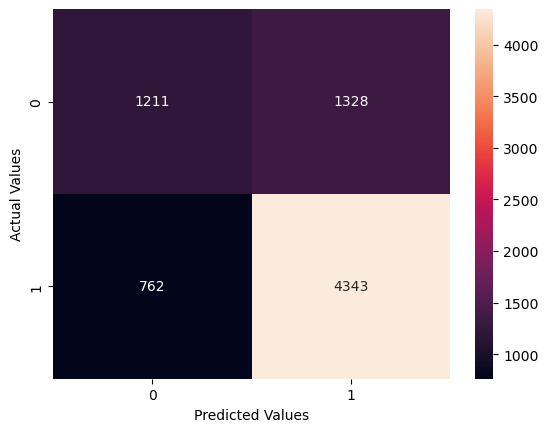

In [539]:
get_cm(xgb, ytest)

The training set is testing well, but not as well as the training, showing signs of overfitting. 

#### Hypertuning XGBoost Model

In [540]:
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss', enable_categorical=True)

param_grid_xgb={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
        
grid_search_xgb = GridSearchCV(xgb_tuned, param_grid_xgb, scoring=scorer)
grid_search_xgb.fit(xtrain, ytrain)

xgb_tuned = grid_search_xgb.best_estimator_
xgb_tuned.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [541]:
xgb_tuned_perf = model_perf(xgb_tuned)
xgb_tuned_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.766091,0.745552,0.887686,0.873849,0.788649,0.77421


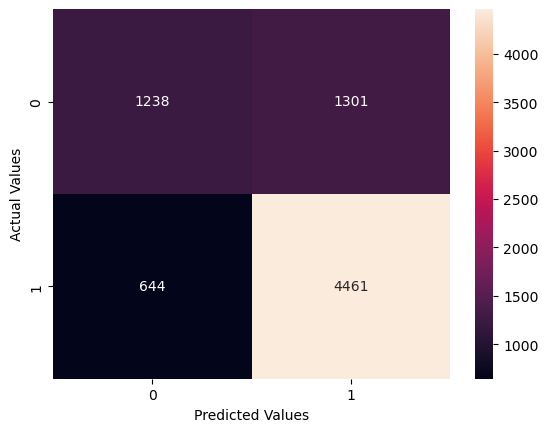

In [542]:
get_cm(xgb_tuned, ytest)

With hypertuning, the metrics of the training set have decreased, but the values are much closer to the test data, showing that overfitting has been mostly eliminated. The model seems to generalize fairly okay as well. 

#### Feature Importance

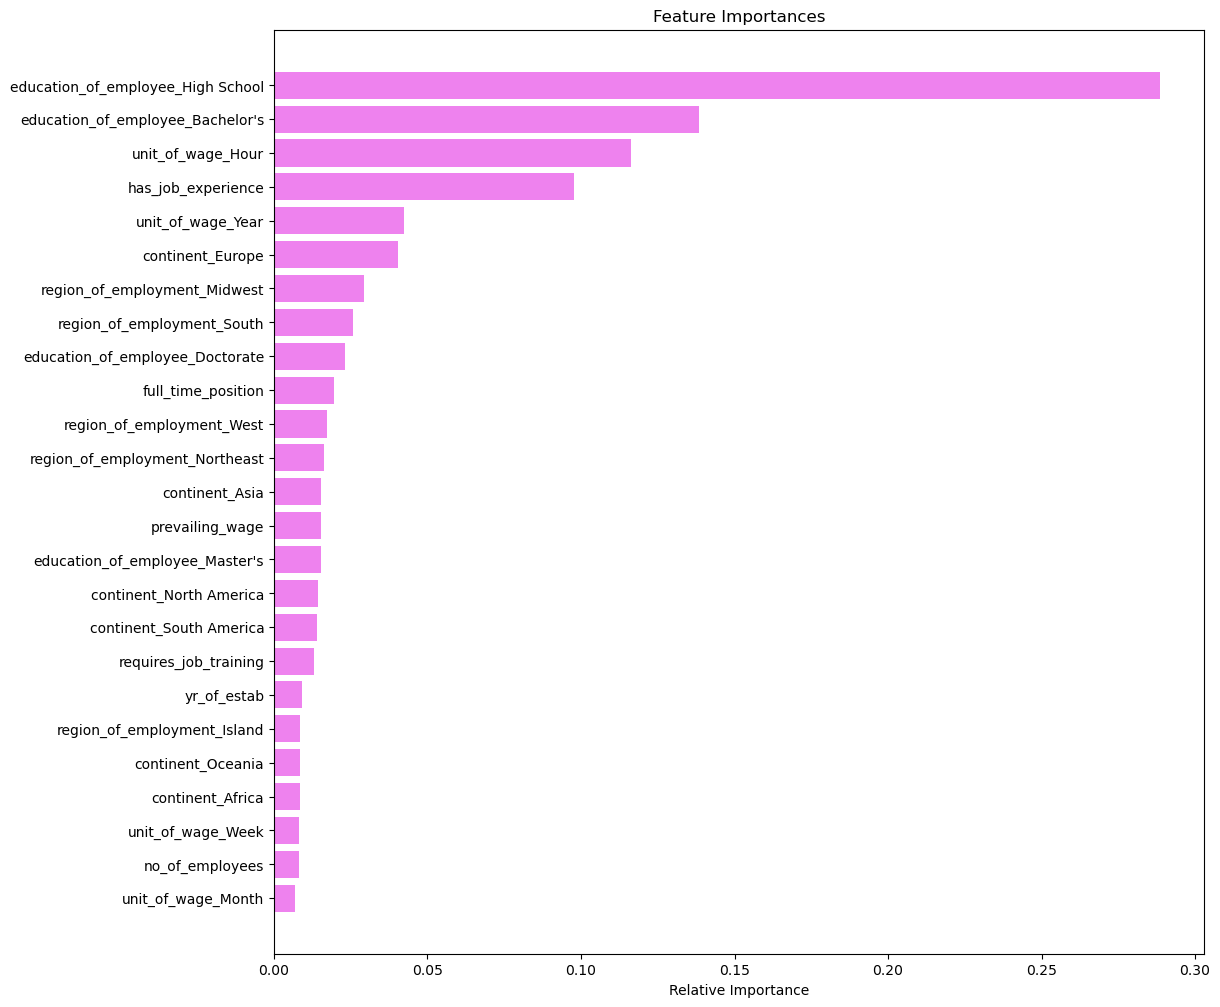

In [543]:
feat_imp(xgb_tuned)

According to the tuned XGBoost model, the most important feature for Visa acceptance is having a high school education. 

### Stacking Model

In [544]:
estimators = [('AdaBoost',ada_tuned),('Random Forest',forest_tuned),('Gradient Boosting',gboost_tuned)]
final_estim = XGBClassifier(random_state=1)

In [545]:
stack = StackingClassifier(estimators = estimators, final_estimator = final_estim)
stack.fit(xtrain,ytrain)

StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=75,
                                                   random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.3,
                                                                     1: 0.7},
                                                       max_samples=0.5,
                                                       min_samples_leaf=2,
                                                       n_estimators=50,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingC...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [546]:
stack_perf = model_perf(stack)
stack_perf

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
0,0.763736,0.734432,0.878536,0.856611,0.790902,0.771116


The stacking model shows slight differences between the test and train sets, so overfitting is not too much of a problem. The model generalizes the data fairly okay. 

## Model Performance Comparison and Conclusions

In [547]:
model_comp = pd.concat(
   [ dtree_perf, dtree_tuned_perf, forest_perf,forest_tuned_perf, bag_perf, bag_tuned_perf, ada_perf, ada_tuned_perf, 
    gboost_perf, gboost_tuned_perf, xgb_perf, xgb_tuned_perf, stack_perf],
    axis=0
)

model_comp.set_index([['Decision Tree', 'Decision Tree Tuned','Random Forest','Random Forest Tuned',
                       'Bagging','Bagging Tuned','AdaBoost','AdaBoost Tuned','Gradient Boost','Gradient Boost Tuned',
                      'XGBoost','XGBoost Tuned','Stacking']],inplace=True)
round(model_comp,3)

,Accuracy of Training Set,Accuracy of Testing Set,Recall Score of Training Set,Recall Score of Testing Set,Precision Score of Testing Set,Precision Score of Training Set
Decision Tree,1.000,0.660,1.000,0.742,1.000,0.747
Decision Tree Tuned,0.738,0.730,0.917,0.916,0.748,0.741
Random Forest,1.000,0.724,1.000,0.835,1.000,0.770
Random Forest Tuned,0.818,0.732,0.976,0.915,0.797,0.743
Bagging,0.984,0.703,0.984,0.776,0.991,0.778
Bagging Tuned,0.738,0.730,0.917,0.916,0.748,0.741
AdaBoost,0.738,0.734,0.886,0.883,0.761,0.759
AdaBoost Tuned,0.758,0.742,0.887,0.877,0.780,0.769
Gradient Boost,0.757,0.745,0.880,0.876,0.783,0.773
Gradient Boost Tuned,0.756,0.745,0.882,0.877,0.781,0.772


Many of the models that are not overfit are very similar in their metrics. They have a precision surrounding 75%, recall in the high 80%, and accuracy in the mid 70%. 

## Actionable Insights and Recommendations

#### Insights
Model Comparison:
 - Although both False Negatives and Positives are important to minimize, because the company wishes to hire individuals who would be accepted, the company would likely wish to minimize the amount of false positives in their hirings.
     - This is because it would be very detrimental to the company if they used the resources to search for and hire someone that turns out to be denied their Visa. This would lead to wasted resources. Thus, a false postive should be avoided.
 - The model with the highest accuracy that is not overtly overfit is the tuned XGBoost model. The model with the highest recall is the bagging and decision tree model. The model with the highest precision score is the tuned XGBoost model. 
- This also shows that the bagging/decision tree model had the lowest amount of false negatives and the xgboost model had the lowest amount of false positives. 

#### Recommendations
- The company should use the tuned XGBoost model to aid in determining whether the candidate will be accepted for a Visa. 
- According to multiple models, including the XGBoost model, the most important features for a candidate to be accepted for a Visa is education. More specifically if they have a High School education or a Bachelor's. The company should focus their resources on looking into the candidates with these criteria met. 
- Since most certified workers are from Asia, the company can focus their efforts on that continent to have better chances of them getting certified. 
- The data shows that those with previous job experience are more likley to be accepted with a Visa, so the company should focus on that feature as well. 
- The prevailing wage feature is not very useful to use as the column includes all wage unit types. The company should redo the data and standardize the wage data so that each ID can have the same wage unit, and thus the wage column will be much more viable in model creations. 
